This notebook implements different basic supervised and unsupervised learning algorithms, and also plots graphs for a few implementations. 



In [ ]:
#@title Implementation of linear regression algorithm to estimate the weight parameters using batch gradient descent algorithm for the implementation. (a) Plotting of the cost function vs the number of iterations. (b) Plotting of the cost function (J) vs w1 and w2 in a 3D graph (w= [w0 w1 w2]). (c) Evaluated mean square error between the actual test output and predicted test output. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def min_max(data_f):
    """Find out the minimum, maximum of training data set to apply for normalization (first column)"""
    max_value = data_f[data_f.columns[0]].max()
    min_value = data_f[data_f.columns[0]].min()
    return max_value, min_value
    
def normalize(data_f, min_value, max_value):
    """Normalizes datasets"""
    result = data_f.copy()
    for feature_name in data_f.columns:
        result[feature_name] = (data_f[feature_name] - min_value) / (max_value - min_value)
    return result

def bgd(weight, iterations, alpha, df_train_f, df_train_o):
    """Applies batch gradient descent"""
    j_list = np.zeros(iterations)
    w_1_list = np.zeros(iterations)
    w_2_list = np.zeros(iterations)
    for i in range(iterations):
        w_1_list[i] = weight[1]
        w_2_list[i] = weight[2]
        h_w = 0
        cf_1 = 0
        cf_2 = 0
        J = 0
        for j in range(len(df_train_f)):
            h_w = weight[0] + df_train_f.iloc[j, 0] * weight[1] + df_train_f.iloc[j, 1] * weight[2]
            cf_1 += (h_w - df_train_o.iloc[j, 0]) * df_train_f.iloc[j, 0]
            cf_2 += (h_w - df_train_o.iloc[j, 0]) * df_train_f.iloc[j, 1]
            J += ((h_w - df_train_o.iloc[j, 0]) ** 2)
        J = 0.5 * J
        print(J)
        j_list[i] = J
        weight[1] = weight[1] - alpha * cf_1
        weight[2] = weight[2] - alpha * cf_2
    y = [j_list, w_1_list, w_2_list]
    return y

def plot_3d(cf, w1, w2):
    """Plots 3D scatter plot"""
    threedee = plt.figure().gca(projection='3d')
    threedee.scatter(cf, w1, w2)
    threedee.set_xlabel('Cost function')
    threedee.set_ylabel('Weight1')
    threedee.set_zlabel('Weight2')
    plt.show()

def error(df_test_f, df_test_o, w1, w2):
    """Calculates mean square error"""
    predicted = np.zeros(len(df_test_f))
    for i in range(len(predicted)):
        predicted[i] = w1[-1] * df_test_f.iloc[i, 0] + w2[-1] * df_test_f.iloc[i, 1]
    mse = ((predicted - np.array(df_test_o))**2).mean(axis=None)
    return mse


if __name__ == "__main__":
    weights = np.empty(3)
    ITERATIONS = 100
    ALPHA = 0.00001
    train_f = pd.read_excel("training_feature_matrix.xlsx")
    train_o = pd.read_excel("training_output.xlsx")
    test_f = pd.read_excel("test_feature_matrix.xlsx")
    test_o = pd.read_excel("test_output.xlsx")
    min_train_f, max_train_f = min_max(train_f)
    print(min_train_f, max_train_f)
    train_f = normalize(train_f, min_train_f, max_train_f)
    train_o = normalize(train_o, min_train_f, max_train_f)
    test_f = normalize(test_f, min_train_f, max_train_f)
    test_o = normalize(test_o, min_train_f, max_train_f)
    cost_weights_list = bgd(weights, ITERATIONS, ALPHA, train_f, train_o)
    plot_3d(cost_weights_list[0], cost_weights_list[1], cost_weights_list[2])
    #plt.plot(cost_weights_list[0])
    plt.show()
    mean_se = error(test_f, test_o, cost_weights_list[1], cost_weights_list[2])
    mean_se = mean_se * (max_train_f - min_train_f) + min_train_f
    print(cost_weights_list[1][-1], cost_weights_list[2][-1])
    print(mean_se)


In [ ]:
#@title Output of cost function which converges, final weights and the MSE.
!/usr/bin/python3 /home/mahesh/Documents/NeuralNets_Assignment1/question1.py

COST VALUES: 

4986.749382088961
4024.4039569752367
3247.7970077587865
2621.0798852380512
2115.3229463215666
1707.1801440022891
1377.811359543452
1112.0127310703567
897.5148340037497
724.4163169141907
584.7268490819362
471.9982819420246
381.0269986012171
307.61371169837605
248.36962173053905
200.55998799442315
161.97789128231216
130.8423611411233
105.71616518660663
85.43946557711784
69.07628018919925
55.871277110082666
45.21490805444408
36.615271242602134
29.675404913397532
24.074963326416817
19.555429406611427
15.90818143793972
12.96486295730936
10.589611317232025
8.672786182887831
7.125908467186603
5.87757608197191
4.870167973944354
4.057184301585907
3.401099974024511
2.8716324698797067
2.444343977547387
2.099513330863899
1.8212256680095429
1.596637791749508
1.4153853195914188
1.2691042575480664
1.1510449130574716
1.055760325044449
0.9788548288646791
0.9167811497352645
0.8666766583603768
0.8262312302114843
0.79358060876569
0.7672203502840175
0.7459363777679503
0.7287489384223682
0.71

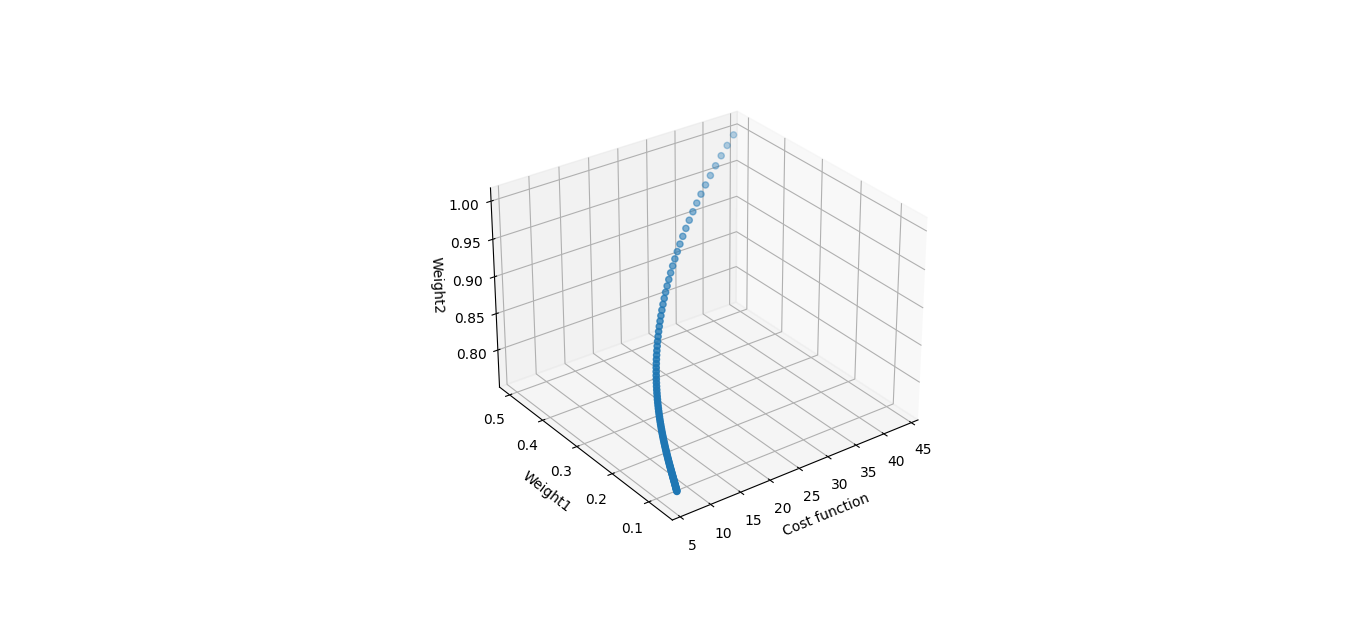

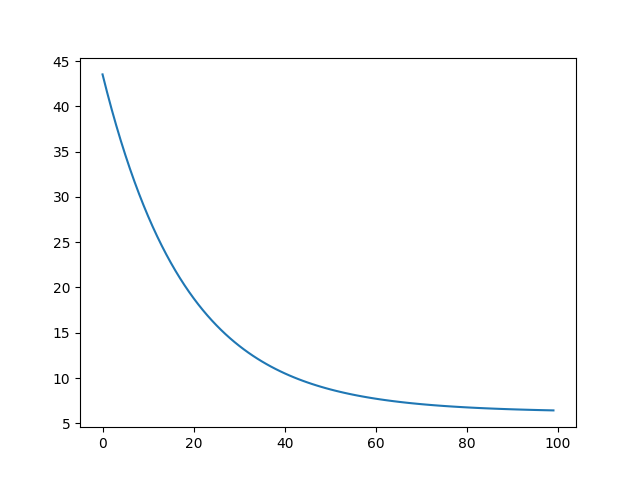

In [ ]:
#@title Graphs for visualization
from IPython.display import Image, display
display(Image('Figure_1_Question1.png'))
display(Image('Figure_2_Question1.png'))


In [ ]:
#@title Implementation of mini-batch and stochastic gradient descent algorithms for the linear regression problem (a) Plotting of the cost function vs the number of iterations. (b) Plotting of the cost function vs w1 and w2. (c) Evaluatation of the mean square error between the actual test output and predicted test output.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def min_max(data_f):
    """Find out the minimum, maximum of training data set to apply for normalization (first column)"""
    max_value = data_f[data_f.columns[0]].max()
    min_value = data_f[data_f.columns[0]].min()
    return max_value, min_value
    
def normalize(data_f, min_value, max_value):
    """Normalizes datasets"""
    result = data_f.copy()
    for feature_name in data_f.columns:
        result[feature_name] = (data_f[feature_name] - min_value) / (max_value - min_value)
    return result

def sgd(weight, iterations, batch_size, alpha, df_train_f, df_train_o):
    """Applies batch gradient descent"""
    j_list = np.zeros((len(df_train_f) // batch_size)* iterations)
    w_1_list = np.zeros((len(df_train_f) // batch_size)* iterations)
    w_2_list = np.zeros((len(df_train_f) // batch_size)* iterations)
    k = 0
    for i in range(iterations):
        idx = np.random.permutation(df_train_f.index)
        df_train_f = df_train_f.reindex(idx)
        df_train_o = df_train_o.reindex(idx)
        h_w = 0
        cf_1 = 0
        cf_2 = 0
        J = 0
        for j in range(len(df_train_f)):
            h_w = weight[0] + df_train_f.iloc[j, 0] * weight[1] + df_train_f.iloc[j, 1] * weight[2]
            cf_1 += (h_w - df_train_o.iloc[j, 0]) * df_train_f.iloc[j, 0]
            cf_2 += (h_w - df_train_o.iloc[j, 0]) * df_train_f.iloc[j, 1]
            J += ((h_w - df_train_o.iloc[j, 0]) ** 2)
            if(((j + 1) % batch_size) == 0):
                J = 0.5 * J
                weight[1] = weight[1] - alpha * cf_1
                weight[2] = weight[2] - alpha * cf_2
                w_1_list[k] = weight[1]
                w_2_list[k] = weight[2]
                j_list[k] = J
                print(J)
                h_w = 0
                cf_1 = 0
                cf_2 = 0
                J = 0
                k += 1
    y = [j_list, w_1_list, w_2_list]
    return y

def plot_3d(cf, w1, w2):
    """Plots 3D scatter plot"""
    threedee = plt.figure().gca(projection='3d')
    threedee.scatter(cf, w1, w2)
    threedee.set_xlabel('Cost function')
    threedee.set_ylabel('Weight1')
    threedee.set_zlabel('Weight2')
    plt.show()

def error(df_test_f, df_test_o, w1, w2):
    """Calculates mean square error"""
    predicted = np.zeros(len(df_test_f))
    for i in range(len(predicted)):
        predicted[i] = w1[-1] * df_test_f.iloc[i, 0] + w2[-1] * df_test_f.iloc[i, 1]
    mse = ((predicted - np.array(df_test_o))**2).mean(axis=None)
    return mse


if __name__ == "__main__":
    weights = np.empty(3)
    ITERATIONS = 10
    ALPHA = 0.00001
    BATCH_SIZE = 20
    train_f = pd.read_excel("training_feature_matrix.xlsx")
    train_o = pd.read_excel("training_output.xlsx")
    test_f = pd.read_excel("test_feature_matrix.xlsx")
    test_o = pd.read_excel("test_output.xlsx")
    min_train_f, max_train_f = min_max(train_f)
    train_f = normalize(train_f, min_train_f, max_train_f)
    train_o = normalize(train_o, min_train_f, max_train_f)
    test_f = normalize(test_f, min_train_f, max_train_f)
    test_o = normalize(test_o, min_train_f, max_train_f)

    cost_weights_list = sgd(weights, ITERATIONS, BATCH_SIZE, ALPHA, train_f, train_o)
    #plot_3d(cost_weights_list[0], cost_weights_list[1], cost_weights_list[2])
    plt.plot(cost_weights_list[0])
    plt.show()
    mean_se = error(test_f, test_o, cost_weights_list[1], cost_weights_list[2])
    print(cost_weights_list[1][-1], cost_weights_list[2][-1])
    print(mean_se)


In [ ]:
#@title Outputs when using mini-batch descent of cost function convergence, weights, and MSE
!/usr/bin/python3 /home/mahesh/Documents/NeuralNets_Assignment1/question2.py

397.2501788649083
389.34729223777504
438.8950178987202
378.7767034050629
376.009616844813
380.8008203051634
336.5544335573374
363.58053910946177
371.63147647245125
355.212290174036
300.31696963500025
367.519351634234
287.839320404984
338.418383149186
338.1685231170964
304.623667829083
262.61878899418343
362.05413100472686
271.3700125154617
271.4727688728197
297.6939220032879
335.9778395406773
331.52405943643237
251.56003692818004
279.38090174227773
257.23422189672795
256.54336269646956
248.04095591100432
257.79123921721566
265.1161847401767
266.8434470576957
241.6453705805197
259.8203396241564
229.3140467113952
219.1748323372362
217.20097970915498
216.85241367802678
206.1428525163736
236.3218565355523
229.1753257439441
227.9708135588371
231.21501143558322
207.14222110918604
206.8929115133969
178.56774589722016
171.06715984793271
173.36692154848345
168.462797647066
174.89599192208493
175.98096351399673
192.50764862591848
181.9068178298479
169.06954967968628
135.26035962325798
178.558112

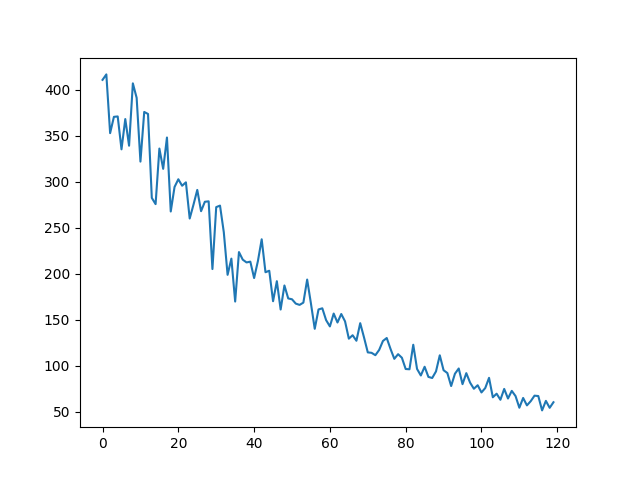

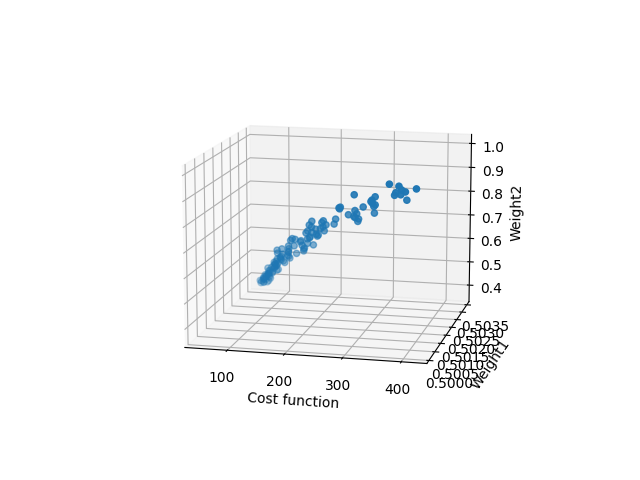

In [ ]:
#@title Graphs to visualize
from IPython.display import Image, display
display(Image('Figure_1_Question2_MiniBatch.png'))
display(Image('Figure_2_Question2_MiniBatch.png'))

In [ ]:
#@title Cost function when using stochastic descent
!/usr/bin/python3 /home/mahesh/Documents/NeuralNets_Assignment1/question2.py


25.710410994406224
22.326866021963863
25.541045973910506
20.39542735822379
18.98687224011183
23.521455973137307
15.379442517570853
24.6588999445185
21.52081914869077
19.21915688032207
16.723285614557184
18.772459651822174
13.461355300428291
18.874910640380307
18.98912894923308
19.37112878679678
28.042149313264087
28.58961216253842
16.137600493325294
29.274649986724704
18.960237157585546
12.57461780511467
26.50063834244604
36.161248487408244
39.91655256429693
15.725982822709256
36.72848857797154
30.457415739956133
41.411763666196684
18.430692160645158
23.601264811207823
18.415705907060985
20.449812849424056
10.075069788276247
18.40780316762095
25.934625212653078
8.581551609734023
18.689477112000844
35.28427378266209
13.950597195469953
16.063228335512242
20.745833556656372
21.87477118443807
23.502860712153666
10.827680906198287
18.449832623669273
23.536956378492288
22.418658115168178
19.954151994011223
9.355857931699028
22.259756388529397
20.204194764185278
16.34862466693885
28.658828952

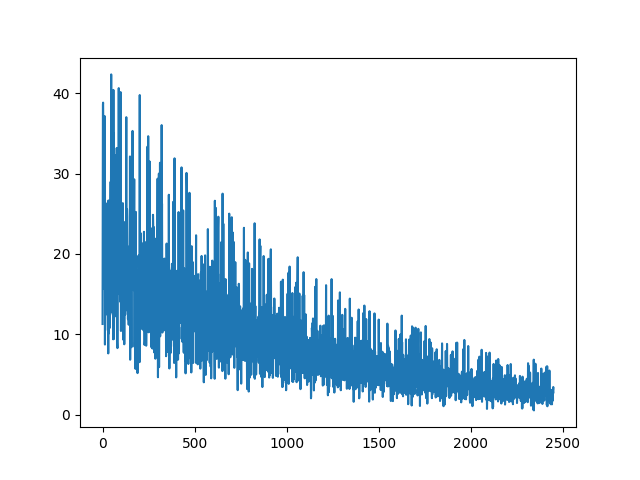

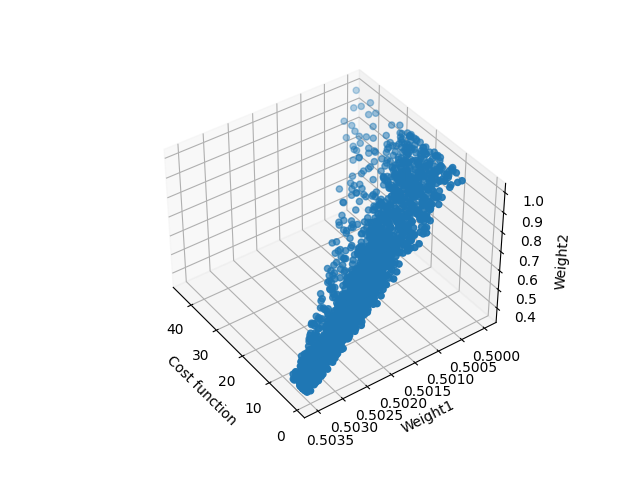

In [ ]:
#@title Graphs to visualize
display(Image('Figure_1_Question2_Stochastic.png'))
display(Image('Figure_2_Question2_Stochastic.png'))

In [ ]:
#@title Implement the ridge regression problem by considering batch, mini-batch and stochastic gradient descent algorithms. (a) Plot the cost function vs the number of iterations for all three cases. (b) Plot the cost function (J) vs w1 and w2 in a contour or 3D surf graph for all three cases. (c) Evaluate the mean square error between the actual test output and predicted test output. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def min_max(data_f):
    """Find out the minimum, maximum of training data set to apply for normalization (first column)"""
    max_value = data_f[data_f.columns[0]].max()
    min_value = data_f[data_f.columns[0]].min()
    return max_value, min_value
    
def normalize(data_f, min_value, max_value):
    """Normalizes datasets"""
    result = data_f.copy()
    for feature_name in data_f.columns:
        result[feature_name] = (data_f[feature_name] - min_value) / (max_value - min_value)
    return result

def ridge_sgd(weight, iterations, batch_size, alpha, df_train_f, df_train_o, lmbda):
    """Applies stochastic gradient descent"""
    j_list = np.zeros((len(df_train_f) // batch_size)* iterations)
    w_1_list = np.zeros((len(df_train_f) // batch_size)* iterations)
    w_2_list = np.zeros((len(df_train_f) // batch_size)* iterations)
    k = 0
    for i in range(iterations):
        idx = np.random.permutation(df_train_f.index)
        df_train_f = df_train_f.reindex(idx)
        df_train_o = df_train_o.reindex(idx)
        h_w = 0
        cf_1 = 0
        cf_2 = 0
        J = 0
        for j in range(len(df_train_f)):
            h_w = weight[0] + df_train_f.iloc[j, 0] * weight[1] + df_train_f.iloc[j, 1] * weight[2]
            cf_1 += (h_w - df_train_o.iloc[j, 0]) * df_train_f.iloc[j, 0]
            cf_2 += (h_w - df_train_o.iloc[j, 0]) * df_train_f.iloc[j, 1]
            J += ((h_w - df_train_o.iloc[j, 0]) ** 2)
            if(((j + 1) % batch_size) == 0):
                J = 0.5 * J
                weight[1] = (1 - alpha * lmbda) * weight[1] - alpha * cf_1
                weight[2] = (1 - alpha * lmbda) * weight[2] - alpha * cf_2
                w_1_list[k] = weight[1]
                w_2_list[k] = weight[2]
                j_list[k] = J
                print(J)
                h_w = 0
                cf_1 = 0
                cf_2 = 0
                J = 0
                k += 1
    y = [j_list, w_1_list, w_2_list]
    return y

def ridge_bgd(weight, iterations, alpha, df_train_f, df_train_o, lmbda):
    """Applies batch gradient descent"""
    j_list = np.zeros(iterations)
    w_1_list = np.zeros(iterations)
    w_2_list = np.zeros(iterations)
    for i in range(iterations):
        w_1_list[i] = weight[1]
        w_2_list[i] = weight[2]
        h_w = 0
        cf_1 = 0
        cf_2 = 0
        J = 0
        for j in range(len(df_train_f)):
            h_w = weight[0] + df_train_f.iloc[j, 0] * weight[1] + df_train_f.iloc[j, 1] * weight[2]
            cf_1 += (h_w - df_train_o.iloc[j, 0]) * df_train_f.iloc[j, 0]
            cf_2 += (h_w - df_train_o.iloc[j, 0]) * df_train_f.iloc[j, 1]
            J += ((h_w - df_train_o.iloc[j, 0]) ** 2)
        J = 0.5 * J
        print(J)
        j_list[i] = J
        weight[1] = (1 - alpha * lmbda) * weight[1] - alpha * cf_1
        weight[2] = (1 - alpha * lmbda) * weight[2] - alpha * cf_2
    y = [j_list, w_1_list, w_2_list]
    return y
    
def plot_3d(cf, w1, w2):
    """Plots 3D scatter plot"""
    threedee = plt.figure().gca(projection='3d')
    threedee.scatter(cf, w1, w2)
    threedee.set_xlabel('Cost function')
    threedee.set_ylabel('Weight1')
    threedee.set_zlabel('Weight2')
    plt.show()

def error(df_test_f, df_test_o, w1, w2):
    """Calculates mean square error"""
    predicted = np.zeros(len(df_test_f))
    for i in range(len(predicted)):
        predicted[i] = w1[-1] * df_test_f.iloc[i, 0] + w2[-1] * df_test_f.iloc[i, 1]
    mse = ((predicted - np.array(df_test_o))**2).mean(axis=None)
    return mse


if __name__ == "__main__":
    weights = np.empty(3)
    ITERATIONS = 50
    ALPHA = 0.00001
    BATCH_SIZE = 20
    LMBDA = 0.5
    train_f = pd.read_excel("training_feature_matrix.xlsx")
    train_o = pd.read_excel("training_output.xlsx")
    test_f = pd.read_excel("test_feature_matrix.xlsx")
    test_o = pd.read_excel("test_output.xlsx")
    min_train_f, max_train_f = min_max(train_f)
    train_f = normalize(train_f, min_train_f, max_train_f)
    train_o = normalize(train_o, min_train_f, max_train_f)
    test_f = normalize(test_f, min_train_f, max_train_f)
    test_o = normalize(test_o, min_train_f, max_train_f)

    #cost_weights_list = ridge_bgd(weights, ITERATIONS, ALPHA, train_f, train_o, LMBDA)
    cost_weights_list = ridge_sgd(weights, ITERATIONS, BATCH_SIZE, ALPHA, train_f, train_o, LMBDA)
    plot_3d(cost_weights_list[0], cost_weights_list[1], cost_weights_list[2])
    #plt.plot(cost_weights_list[0])
    #plt.show()
    mean_se = error(test_f, test_o, cost_weights_list[1], cost_weights_list[2])
    mean_se = mean_se * (max_train_f - min_train_f) + min_train_f
    print(cost_weights_list[1][-1], cost_weights_list[2][-1])
    print(mean_se)


In [ ]:
#@title Batch descent for ridge regression (Cost, Weights, MSE)
!/usr/bin/python3 /home/mahesh/Documents/NeuralNets_Assignment1/question3.py

4986.749382088961
4024.358858833185
3247.724190471902
2620.991701751101
2115.2280159842767
1707.0843333756827
1377.7185237080685
1111.9252713469782
897.4341153369211
724.3429783127143
584.6610328478631
471.9398014709285
380.9754599255038
307.56860037732554
248.3303639348718
200.52599250880684
161.94857751529534
130.8171769782983
105.69459756346514
85.42104591613503
69.06058628914084
55.8579326539118
45.20358058419232
36.60566921084408
29.667274242796672
24.068083776696735
19.54961095111354
15.903260781099817
12.960700273362304
10.586087254231417
8.669799150892759
7.123372212329509
5.875417536894091
4.868325368126544
4.055605511181034
3.3997410890048023
2.8704565559663844
2.4433200110052473
2.0986152854582674
1.8204317349846575
1.5959297154162448
1.4147478328861478
1.2685246036612217
1.150512440878754
1.0552661477007983
0.9783915360219706
0.9163425655900425
0.8662576383657945
0.8258274905682895
0.7931885835736544
Figure(640x480)
0.504535566132029 0.014820401057272803
3.1146962261071325


In [ ]:
#@title MiniBatch descent (Cost, Weights, MSE)
!/usr/bin/python3 /home/mahesh/Documents/NeuralNets_Assignment1/question3.py

435.14108676946654
402.09403791054416
395.69552685218054
401.8970954261753
395.5045478496186
351.5962714132895
354.491243922599
387.30876299456236
329.9974775669128
320.343072489305
325.42148338391746
357.2952929472325
337.5831363652971
328.02989027684015
304.88486128942714
258.5293823059476
361.9673006919441
309.14389724166847
326.25728436188706
286.04914167276735
286.72912777053904
253.80457211761154
259.5961029441066
351.55921193681615
272.31137436573897
304.00326464668495
242.50416870348255
298.8789012156022
259.08840584459085
229.06129695142397
250.59765564531492
220.0896962720938
227.25571313217603
228.11552284292392
216.37009639178353
237.08318069732775
222.49295393344704
200.68027512475336
220.05477498947022
217.46697778588305
221.25000288648945
186.40420235483597
221.4469530382046
209.66691789061508
204.70514362286215
190.72188869761047
156.53281630376267
203.5154596490941
166.08326101832947
193.8012844236255
183.76376276931282
163.34375064792627
175.6512023051468
158.06297022

In [ ]:
#@title Stochastic descent (Cost, Weights, MSE)
!/usr/bin/python3 /home/mahesh/Documents/NeuralNets_Assignment1/question3.py

Streaming output truncated to the last 5000 lines.
0.05657303214875268
0.06072121122178204
0.07199302343214734
0.07003207611209541
0.04156939167269624
0.044339765074386334
0.03366376816242417
0.033925863233473165
0.06122864329422421
0.06134362619278904
0.10522745489646175
0.04760514088495226
0.031470746391903615
0.1055146451460507
0.09101342961365716
0.10471820360537719
0.04822536248446987
0.06071967120990423
0.05496691306884127
0.023563727262188763
0.04564635975526481
0.0327639590946314
0.07199176139461091
0.037512945070740496
0.04013173828403615
0.02210179820915186
0.022701388763466
0.021606510635460298
0.04769734328529627
0.03215247091478613
0.06225973670762791
0.07076075066553672
0.05216023253545981
0.03217310801195272
0.03763581131966722
0.044683606803139646
0.03325483689649411
0.04495124089941298
0.025099121942218302
0.03490435883276418
0.028845182121060287
0.030474653736543525
0.03867234143116799
0.03402967328794792
0.06684048976472648
0.03843029911162675
0.05825843158125634
0.0

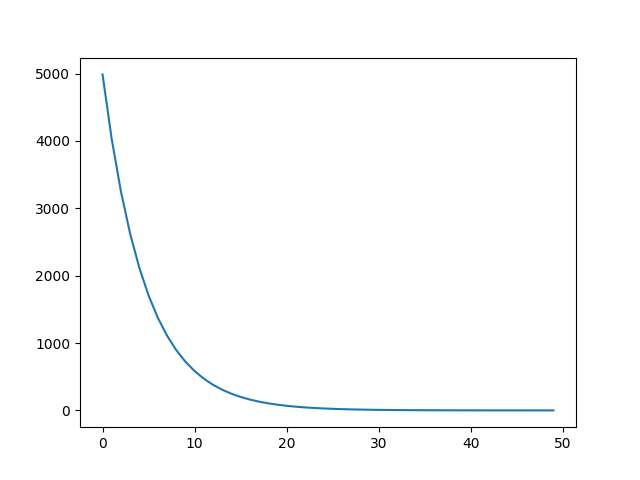

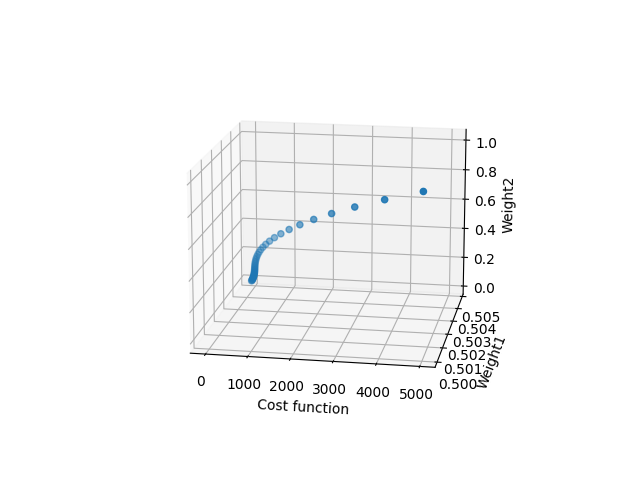

In [ ]:
#@title Figure Batch
from IPython.display import Image, display
display(Image('Figure_1_Question3_Batch.png'))
display(Image('Figure_2_Question3_Batch.png'))

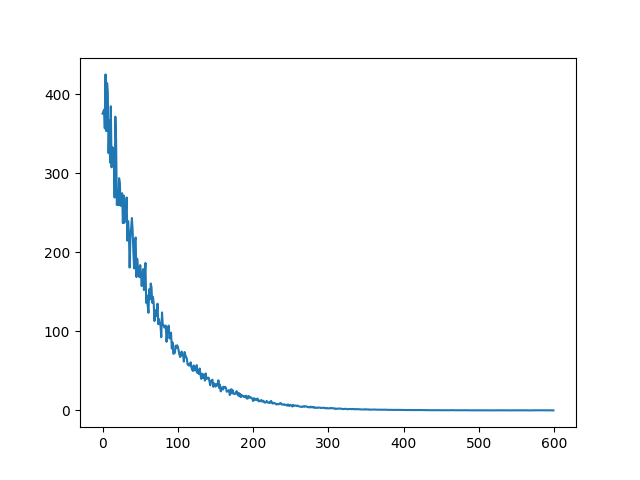

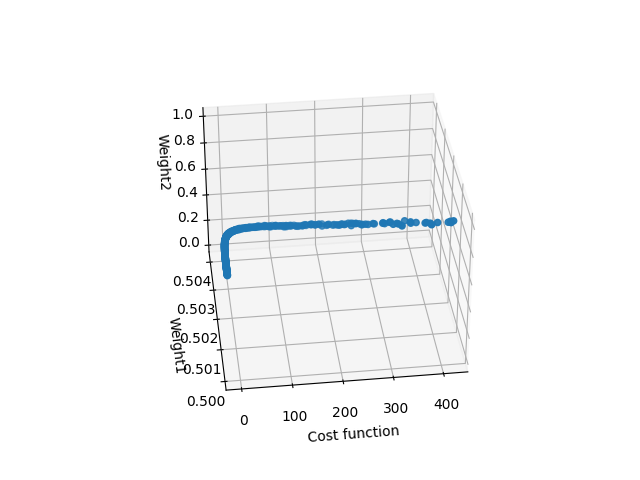

In [ ]:
#@title Figure MiniBatch
from IPython.display import Image, display
display(Image('Figure_1_Question3_MiniBatch.png'))
display(Image('Figure_2_Question3_MiniBatch.png'))

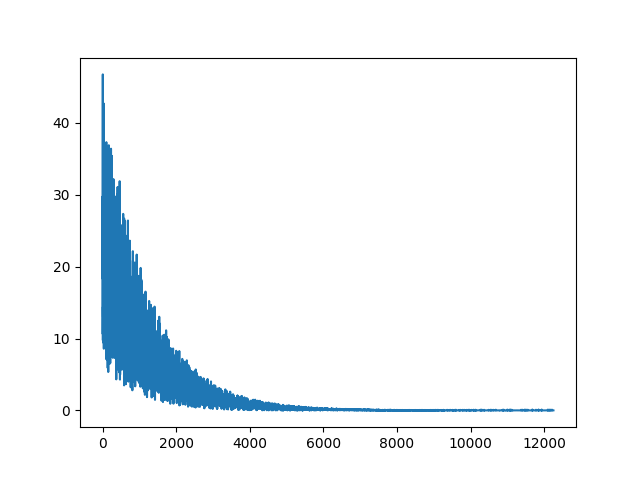

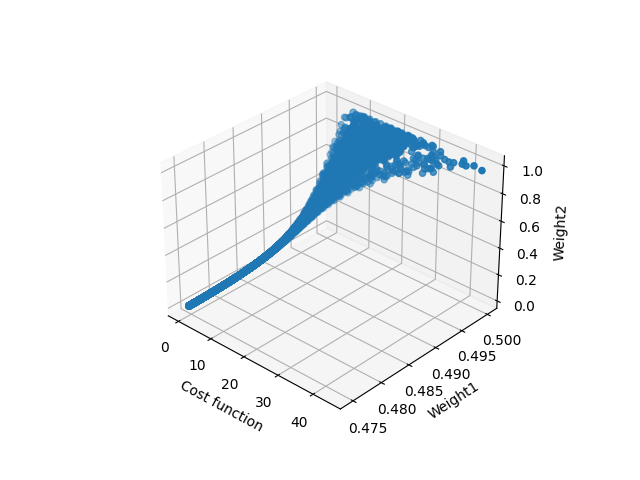

In [ ]:
#@title Figure Stochastic
from IPython.display import Image, display
display(Image('Figure_1_Question3_Stochastic.png'))
display(Image('Figure_2_Question3_Stochastic.png'))

In [ ]:
#@title Implementation of least angle regression to estimate the weight parameters for the feature matrix (X) and the class label vector (y) by considering batch, mini-batch and stochastic gradient descent-based algorithms. (a) Plot the cost function vsthe number of iterations for all three cases. (b) Plot the cost function (J) vs w1 and w2 in a contour or 3D surf graph for all three cases. (c) Evaluate the mean square error between the actual test output and predicted test output. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def min_max(data_f):
    """Find out the minimum, maximum of training data set to apply for normalization (first column)"""
    max_value = data_f[data_f.columns[0]].max()
    min_value = data_f[data_f.columns[0]].min()
    return max_value, min_value
    
def normalize(data_f, min_value, max_value):
    """Normalizes datasets"""
    result = data_f.copy()
    for feature_name in data_f.columns:
        result[feature_name] = (data_f[feature_name] - min_value) / (max_value - min_value)
    return result

def least_angle_sgd(weight, iterations, batch_size, alpha, df_train_f, df_train_o, lmbda):
    """Applies stochastic gradient descent"""
    j_list = np.zeros((len(df_train_f) // batch_size)* iterations)
    w_1_list = np.zeros((len(df_train_f) // batch_size)* iterations)
    w_2_list = np.zeros((len(df_train_f) // batch_size)* iterations)
    k = 0
    for i in range(iterations):
        idx = np.random.permutation(df_train_f.index)
        df_train_f = df_train_f.reindex(idx)
        df_train_o = df_train_o.reindex(idx)
        h_w = 0
        cf_1 = 0
        cf_2 = 0
        J = 0
        for j in range(len(df_train_f)):
            h_w = weight[0] + df_train_f.iloc[j, 0] * weight[1] + df_train_f.iloc[j, 1] * weight[2]
            cf_1 += (h_w - df_train_o.iloc[j, 0]) * df_train_f.iloc[j, 0]
            cf_2 += (h_w - df_train_o.iloc[j, 0]) * df_train_f.iloc[j, 1]
            J += ((h_w - df_train_o.iloc[j, 0]) ** 2)
            if(((j + 1) % batch_size) == 0):
                J = 0.5 * J
                weight[1] = (weight[1] - alpha * lmbda * np.sign(weight[1]))  - alpha * cf_1
                weight[2] = (weight[2] - alpha * lmbda * np.sign(weight[2]))  - alpha * cf_2
                w_1_list[k] = weight[1]
                w_2_list[k] = weight[2]
                j_list[k] = J
                print(J)
                h_w = 0
                cf_1 = 0
                cf_2 = 0
                J = 0
                k += 1
    y = [j_list, w_1_list, w_2_list]
    return y

def least_angle_bgd(weight, iterations, alpha, df_train_f, df_train_o, lmbda):
    """Applies batch gradient descent"""
    j_list = np.zeros(iterations)
    w_1_list = np.zeros(iterations)
    w_2_list = np.zeros(iterations)
    for i in range(iterations):
        w_1_list[i] = weight[1]
        w_2_list[i] = weight[2]
        h_w = 0
        cf_1 = 0
        cf_2 = 0
        J = 0
        for j in range(len(df_train_f)):
            h_w = weight[0] + df_train_f.iloc[j, 0] * weight[1] + df_train_f.iloc[j, 1] * weight[2]
            cf_1 += (h_w - df_train_o.iloc[j, 0]) * df_train_f.iloc[j, 0]
            cf_2 += (h_w - df_train_o.iloc[j, 0]) * df_train_f.iloc[j, 1]
            J += ((h_w - df_train_o.iloc[j, 0]) ** 2)
        J = 0.5 * J
        print(J)
        j_list[i] = J
        weight[1] = (weight[1] - alpha * lmbda * np.sign(weight[1]))  - alpha * cf_1
        weight[2] = (weight[2] - alpha * lmbda * np.sign(weight[2]))  - alpha * cf_2
    y = [j_list, w_1_list, w_2_list]
    return y
    
def plot_3d(cf, w1, w2):
    """Plots 3D scatter plot"""
    threedee = plt.figure().gca(projection='3d')
    threedee.scatter(cf, w1, w2)
    threedee.set_xlabel('Cost function')
    threedee.set_ylabel('Weight1')
    threedee.set_zlabel('Weight2')
    plt.show()

def error(df_test_f, df_test_o, w1, w2):
    """Calculates mean square error"""
    predicted = np.zeros(len(df_test_f))
    for i in range(len(predicted)):
        predicted[i] = w1[-1] * df_test_f.iloc[i, 0] + w2[-1] * df_test_f.iloc[i, 1]
    mse = ((predicted - np.array(df_test_o))**2).mean(axis=None)
    return mse


if __name__ == "__main__":
    weights = np.empty(3)
    ITERATIONS = 50
    ALPHA = 0.00001
    BATCH_SIZE = 10
    LMBDA = 0.5
    train_f = pd.read_excel("training_feature_matrix.xlsx")
    train_o = pd.read_excel("training_output.xlsx")
    test_f = pd.read_excel("test_feature_matrix.xlsx")
    test_o = pd.read_excel("test_output.xlsx")
    min_train_f, max_train_f = min_max(train_f)
    train_f = normalize(train_f, min_train_f, max_train_f)
    train_o = normalize(train_o, min_train_f, max_train_f)
    test_f = normalize(test_f, min_train_f, max_train_f)
    test_o = normalize(test_o, min_train_f, max_train_f)

    # cost_weights_list = least_angle_bgd(weights, ITERATIONS, ALPHA, train_f, train_o, LMBDA)
    cost_weights_list = least_angle_sgd(weights, ITERATIONS, BATCH_SIZE, ALPHA, train_f, train_o, LMBDA)
    plot_3d(cost_weights_list[0], cost_weights_list[1], cost_weights_list[2])
    #plt.plot(cost_weights_list[0])
    #plt.show()
    mean_se = error(test_f, test_o, cost_weights_list[1], cost_weights_list[2])
    mean_se = mean_se * (max_train_f - min_train_f) + min_train_f
    print(cost_weights_list[1][-1], cost_weights_list[2][-1])
    print(mean_se)


In [ ]:
#@title Batch (Cost, Weights, MSE)
!/usr/bin/python3 /home/mahesh/Documents/NeuralNets_Assignment1/question4.py

4986.749382088961
4024.358987064117
3247.7203161917064
2620.9816985206926
2115.2110996786096
1707.0605853573759
1377.6885519122081
1111.889973412122
897.3945166641839
724.3001246371948
584.6159220284377
471.8933431063198
380.92845436703874
307.5217309494987
248.2841978621773
200.48098731177723
161.9050905807948
130.77547670645333
105.65487500569343
85.38342619129081
69.02513933271504
55.824683045177025
45.17251632837732
36.57674944319316
29.640435880252653
24.04324717960692
19.526684678253844
15.882145531229783
12.941292108981711
10.568280200772419
8.653487259094435
7.108451164317944
5.861785868442229
4.855885371318626
4.044263873663388
3.3894093184253524
2.8610512312344496
2.4347628957117355
2.0908333332020845
1.8133570114372966
1.589499257685957
1.4089034630647108
1.2632127102944692
1.1456837394382662
1.0508754288918292
0.9743974088880016
0.9127072008176269
0.8629465159093276
0.8228091546629651
0.7904344073502649
Figure(640x480)
0.5044133324864765 0.014772781788098679
3.1185754927121

In [ ]:
#@title MiniBatch (Cost, Weights, MSE)
!/usr/bin/python3 /home/mahesh/Documents/NeuralNets_Assignment1/question4.py

215.88985898573813
221.59288942423086
190.00957629590155
239.78477801939889
184.31368905474318
186.1184611816597
176.2867631306758
177.32349481579064
145.61779707726745
163.79723734960888
203.26804941810076
165.98015990806198
200.9051618654712
190.20320794554794
172.3230073599961
180.3882713280805
172.3194228874933
183.47902690528616
167.75829657866853
180.8363307683338
202.6343305061734
169.42077587411316
196.24168313028818
159.0158594105991
139.3777204671042
174.4351686082301
168.17618676734583
169.28438440502566
144.35490335744865
177.6087437857633
140.64598268638608
136.80757559397946
112.99305259676461
138.65329749430643
130.44191821619012
189.671106649444
162.7951288017178
152.52410546272264
183.9500355766197
152.7639479280695
146.23834408915263
139.59071237435055
158.40677100120212
127.38603115174249
156.2133650394703
153.4254128380536
152.51686671949867
125.74516901253519
127.2507125053079
125.75165175881514
157.35280323130607
153.329046630254
125.85964606780549
132.31364844008

In [ ]:
#@title Stochastic (Cost, Weights, MSE)
!/usr/bin/python3 /home/mahesh/Documents/NeuralNets_Assignment1/question4.py

Streaming output truncated to the last 5000 lines.
0.059401978515833835
0.028923234285335133
0.03128447651565651
0.06433319113607122
0.02912724504685418
0.04733949054571401
0.03897265213011466
0.03420360749627828
0.01486445426088574
0.03561298474076068
0.013662772651277537
0.014098746541156846
0.024001529330995797
0.014611294539110711
0.026285623649489612
0.04560525384346433
0.044401088959470925
0.0461293526216455
0.014191992532501462
0.05022468029238825
0.026655735966819676
0.01973132879593333
0.029763880114423033
0.03763639296701548
0.03370043652538586
0.04606456289920773
0.0772589873296664
0.06931882722927225
0.0341312391791072
0.026063292172779754
0.021737527950079768
0.029626144270733835
0.025772928407771116
0.017643116441705322
0.04817445087663085
0.017816525770946185
0.037091931616394624
0.027609505458272968
0.02513656352559205
0.04651033850530113
0.028561301618617016
0.019601271329226053
0.020629850629360173
0.053916522273319646
0.02291305906428835
0.020417605474790136
0.045020

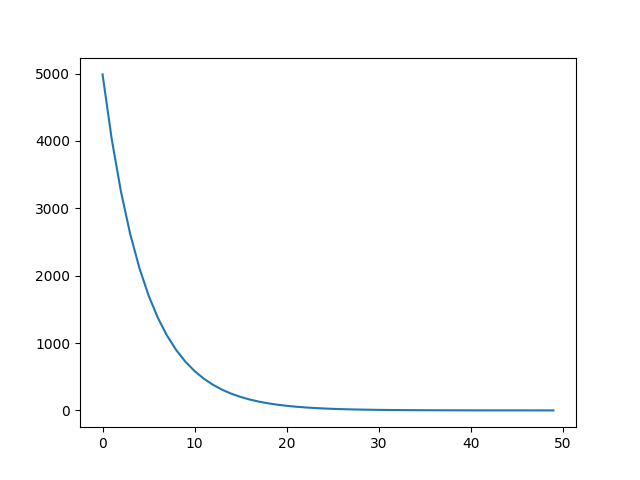

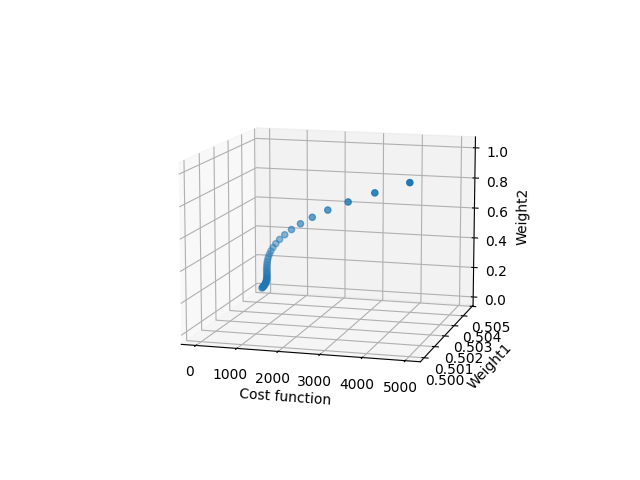

In [ ]:
#@title LAR Figure batch
from IPython.display import Image, display
display(Image('Figure_1_Question4_Batch.png'))
display(Image('Figure_2_Question4_Batch.png'))

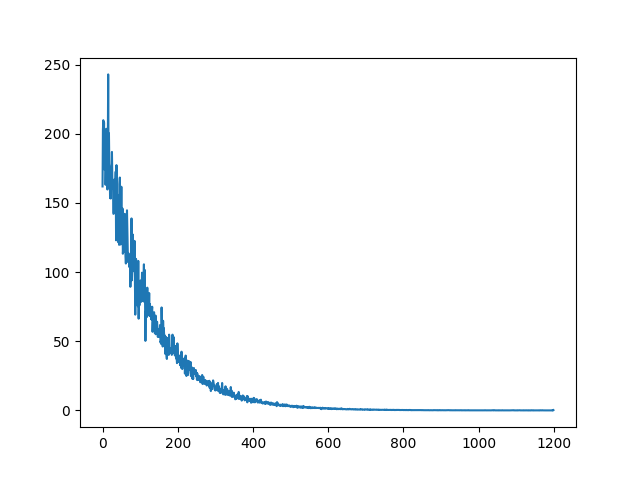

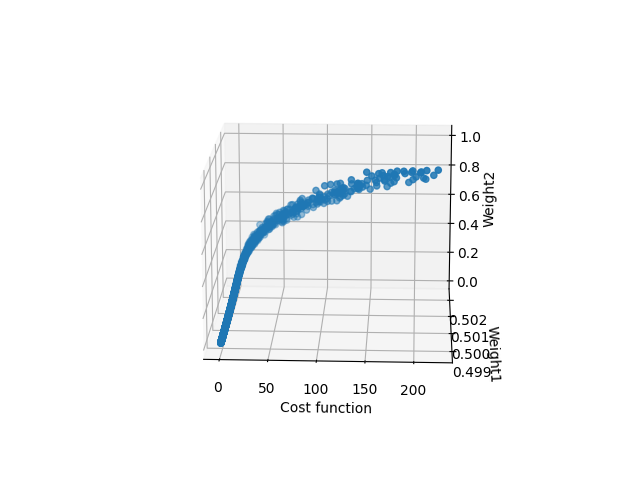

In [ ]:
#@title LAR Figure MiniBatch
from IPython.display import Image, display
display(Image('Figure_1_Question4_MiniBatch.png'))
display(Image('Figure_2_Question4_MiniBatch.png'))

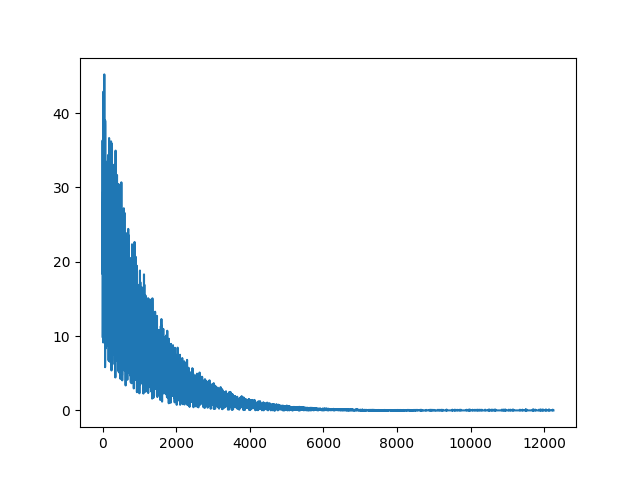

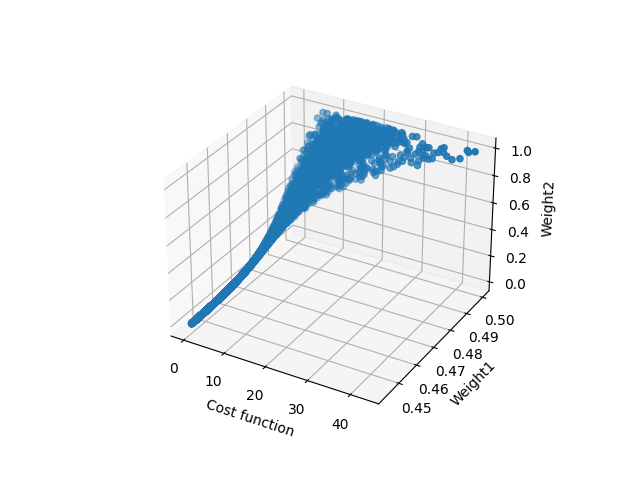

In [ ]:
#@title LAR Figure Stochastic
from IPython.display import Image, display
display(Image('Figure_1_Question4_Stochastic.png'))
display(Image('Figure_2_Question4_Stochastic.png'))

In [ ]:
#@title Implementation of the vectorized linear regression, ridge regression and least angle regression problems to evaluate the weight parameters.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_f = pd.read_excel("training_feature_matrix.xlsx")
train_o = pd.read_excel("training_output.xlsx")
test_f = pd.read_excel("test_feature_matrix.xlsx")
test_o = pd.read_excel("test_output.xlsx")
idx = np.random.permutation(train_f.index)
train_f = train_f.reindex(idx)
train_o = train_o.reindex(idx)
idx = np.random.permutation(test_f.index)
test_f = test_f.reindex(idx)
test_o = test_o.reindex(idx)

# LINEAR REGRESSION
linear_regression_weight_parameters = (np.linalg.inv(train_f.T@train_f)@(train_f.T@train_o))

# RIDGE REGRESSION
lmbda = 2
ridge_regression_weight_parameters = (np.linalg.inv(train_f.T@train_f + lmbda*np.identity(2))@(train_f.T@train_o))

# LEAST SQUARE REGRESSION
least_square_regression_weight_parameters = (np.linalg.inv(train_f.T@train_f)@(train_f.T@train_o - lmbda/2*(-1)))

print("WEIGHTS OF THE THREE METHODS : ")
print("RIDGE : ")
print(ridge_regression_weight_parameters)
print("LEAST SQUARE : ")
print(least_square_regression_weight_parameters)
print("LINEAR :")
print(linear_regression_weight_parameters)
print("COMPARING IT WITH PREVIOUS QUESTIONS:")
print("LINEAR WEIGHT: ")
print("Weights are : 0.50347560312103 0.009662601913104113")
print("RIDGE WEIGHT:")
print("Weights are : 0.5031112262377448 0.016320308339933785")
print("LEAST SQUARE WEIGHT:")
print("Weights are : 0.5044133324864765 0.014772781788098679")


predicted_output = test_f@linear_regression_weight_parameters.to_numpy()
mse = ((predicted_output - np.array(test_o))**2).mean(axis=0)/len(test_o)
print("MSE IS:")
print(mse)

WEIGHTS OF THE THREE METHODS : 
RIDGE : 
          Y
0 -0.015540
1  0.012535
LEAST SQUARE : 
          Y
0 -0.015535
1  0.012535
LINEAR :
          Y
0 -0.015540
1  0.012535
COMPARING IT WITH PREVIOUS QUESTIONS:
LINEAR WEIGHT: 
Weights are : 0.50347560312103 0.009662601913104113
RIDGE WEIGHT:
Weights are : 0.5031112262377448 0.016320308339933785
LEAST SQUARE WEIGHT:
Weights are : 0.5044133324864765 0.014772781788098679
MSE IS:
0    0.306827
dtype: float64


CENTROIDS: 
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.00408163 3.41632653 1.46530612 0.24489796]
 [6.85       3.07368421 5.74210526 2.07105263]]


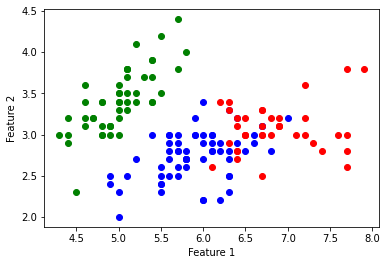

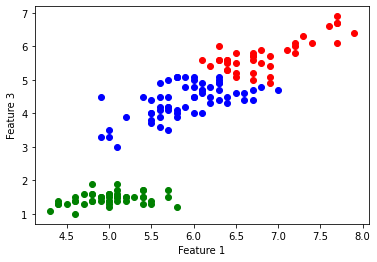

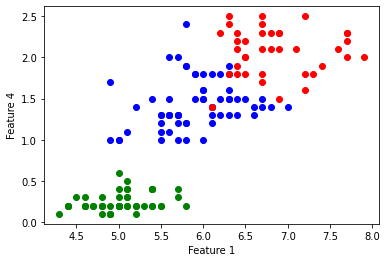

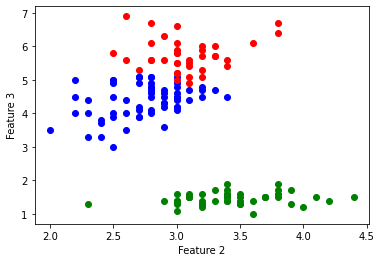

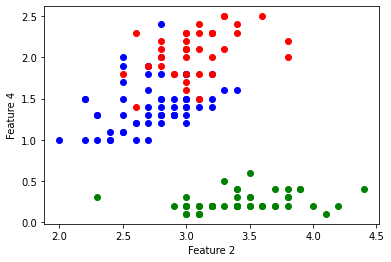

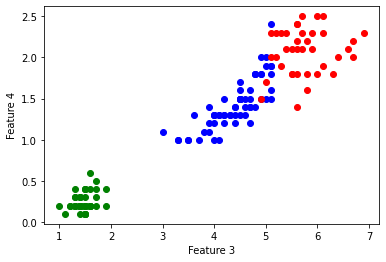

In [ ]:
#@title Implementation of K-means clustering based unsupervised learning algorithm for the dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def initialize_centroids(X, k):
    """Shuffling Array and choosing first k feature vectors as initial centroids"""
    random_idx = np.random.permutation(X.shape[0])
    centroids = [X[random_idx[i]] for i in range(k)]
    return np.array(centroids)

def compute_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i, :] = np.mean(X[labels == i, :], axis=0)
    return centroids

def compute_distance(X, centroids, k):
    distance = np.zeros((X.shape[0], k))
    for i in range(k):
        row_norm = np.linalg.norm(X - centroids[i, :], axis=1)
        distance[:, i] = np.square(row_norm)
    return distance

def find_closest_cluster(distance):
    return np.argmin(distance, axis=1)

def feature_vectors_from_labels(data, labels):
    label_1 = []
    label_2 = []
    label_3 = []
    for x, val in np.ndenumerate(labels):
        if (val == 0):
            label_1.append(data[x])
        elif (val == 1):
            label_2.append(data[x])
        elif (val == 2):
            label_3.append(data[x])

    return np.array(label_1), np.array(label_2), np.array(label_3)

data2 = pd.read_excel("data2.xlsx")
data2 = data2.sample(frac=1)
data2 = data2.to_numpy()
k = 3
MAX_ITER = 3000
centroids = initialize_centroids(data2, k)
for i in range(MAX_ITER):
            old_centroids = centroids
            distance = compute_distance(data2, old_centroids, k)
            labels = find_closest_cluster(distance)
            centroids = compute_centroids(data2, labels, k)
            if np.all(old_centroids == centroids):
                break
print("CENTROIDS: ")
print(centroids)
label_1, label_2, label_3 = feature_vectors_from_labels(data2, labels)
# Plotting pairs of feature vectors [(0, 1), (0, 2) etc]
for i in range(3):
  for j in range(i + 1, 4):        
    plt.scatter(label_1[:, [i]], label_1[:, [j]], color="blue")
    plt.scatter(label_2[:, [i]], label_2[:, [j]], color="green")
    plt.scatter(label_3[:, [i]], label_3[:, [j]], color="red")
    plt.xlabel('Feature '+str(i+1))
    plt.ylabel('Feature '+str(j+1))
    plt.show()

QUESTION 7


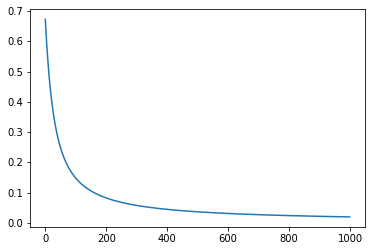

CONFUSION MATRIX
[[18.  0.]
 [ 0. 22.]]
SENSITIVITY
1.0
SPECIFICITY
1.0
OVERALL ACCURACY
1.0


QUESTION 8
ONE VS ONE
[[24.  0.  0.]
 [ 3.  1. 15.]
 [ 0.  0. 17.]]
Class 1 Accuracy
1.0
Class 2 Accuracy
0.05263157894736842
Class 3 Accuracy
1.0
SENSITIVITY
1.0
SPECIFICITY
1.0
OVERALL ACCURACY
0.7


ONE VS ALL
[[24.  0.  0.]
 [ 0. 19.  0.]
 [ 0.  6. 11.]]
Class 1 Accuracy
1.0
Class 2 Accuracy
1.0
Class 3 Accuracy
0.6470588235294118
SENSITIVITY
1.0
SPECIFICITY
1.0
OVERALL ACCURACY
0.9


5 FOLD
[array([[13.,  0.,  0.],
       [ 0.,  8.,  2.],
       [ 0.,  3.,  4.]]), array([[ 7.,  0.,  0.],
       [ 1., 11.,  1.],
       [ 0.,  5.,  5.]]), array([[7., 0., 0.],
       [1., 7., 0.],
       [0., 9., 6.]]), array([[12.,  0.,  0.],
       [ 0., 10.,  0.],
       [ 0.,  4.,  4.]]), array([[11.,  0.,  0.],
       [ 0.,  9.,  0.],
       [ 0.,  5.,  5.]])]
FOLD 1
Class 1 Accuracy
1.0
Class 2 Accuracy
0.8
Class 3 Accuracy
0.5714285714285714
SENSITIVITY
1.0
SPECIFICITY
1.0
OVERALL ACCURACY
0.83333333

In [ ]:
#@title Implement the logistic regression algorithm for the binary classification using the dataset and multiclass regression algorithms using "One for One" and "One for All" methods. Also apply 5 fold cross validation for better performance.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def seperation(data):
    """Seperates dataset into feature vectors and class labels"""
    data_f = data.drop(['CL'], axis=1)
    data_CL = data['CL']
    return data_f, data_CL

def five_fold(data, iterations, learning_rate, q):
    """Applies five fold cross validation"""
    confusion_5_fold = []
    k = 5
    data = data.sample(frac=1)
    folds = np.array_split(data, k)
    for i in range(k):
        train = folds.copy()
        test = folds[i]
        del train[i]
        train = pd.concat(train, sort=False)
        test_f, test_CL = seperation(test)
        test_f = normalize(test_f)
        test_CL = test_CL.to_numpy()
        test_CL = test_CL[:, np.newaxis]
        params_class = multiclass_regression_one_for_all(train, iterations, learning_rate, False)
        labels = class_labels(test_f.to_numpy(), params_class)
        labels = labels_one_for_all(labels)

        confusion_5_fold.append(confusion_matrix(test_CL, labels, q))
    return (confusion_5_fold)

def normalize(data):
    """ Normalize dataset"""
    data = (data - data.mean()) / data.std()
    return data
 
def hold_out_cross_validation(data_f, data_CL, ratio):
    """Splits datasets(feature vectors and class labels) into given ratio"""
    train_f, test_f = np.split(data_f, [int(ratio*len(data_f))])
    train_f = train_f.to_numpy()
    test_f = test_f.to_numpy()
 
    train_CL, test_CL = np.split(data_CL, [int(ratio*len(data_CL))])
    train_CL = train_CL.to_numpy()
    test_CL = test_CL.to_numpy()
 
    return (train_f, train_CL, test_f, test_CL)
 
def sigmoid(x):
    """Computes the sigmoid of a matrix"""
    return 1 / (1 + np.exp(-x))

def compute_cost(X, Y, weight):
    m = len(Y)
    h = sigmoid(X @ weight)
    epsilon = 1e-5
    cost = (1/m)*(((-Y).T @ np.log(h + epsilon))-((1-Y).T @ np.log(1-h + epsilon)))
    return cost
 
def gradient_descent(X, Y, params, learning_rate, iterations):
    m = len(Y)
    cost_history = np.zeros((iterations,1))
 
    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - Y)) 
        cost_history[i] = compute_cost(X, Y, params)
 
    return (cost_history, params)

def logistic_regression(train_f, train_CL, params, iterations, learning_rate):
    initial_cost = compute_cost(train_f, train_CL, params)
    (cost_history, params_optimal) = gradient_descent(train_f, train_CL, params, learning_rate, iterations)
    cost_history = np.hstack(cost_history)
    return cost_history, params_optimal

def predict(X, params):
    """Predicts probability of feature vector mapping to a class"""
    return np.round(sigmoid(X @ params))

def multiclass_regression_one_for_all(data, iterations, learning_rate, flag):
    """Uses one for all method to return parameters"""
    if (flag):
        # For Normal One for All (With 0.6 Split)
        data_f, data_CL = seperation(data)
        data_f = normalize(data_f)
        train_f, train_CL, test_f, test_CL = hold_out_cross_validation(data_f, data_CL, 0.6)
        params_class = []
        train_CL = train_CL[:, np.newaxis]
        test_CL = test_CL[:, np.newaxis]
    else:
        # For 5 Fold Validation
        train_f, train_CL = seperation(data)
        train_f = normalize(train_f)
        train_f = train_f.to_numpy()
        train_CL = train_CL.to_numpy()
        params_class = []
        train_CL = train_CL[:, np.newaxis]
    for i in range(1, 4):
        params = np.zeros((np.size(train_f, 1), 1))
        train_CL_copy = train_CL.copy()
        train_CL_copy[train_CL_copy != i] = 0
        train_CL_copy[train_CL_copy == i] = 1
        cost_history, params_optimal = logistic_regression(train_f, train_CL_copy, params, iterations, learning_rate)
        params_class.append(params_optimal)
    if (flag):
        return test_f, test_CL, params_class
    else:
        return params_class

def multiclass_regression_one_for_one(data, iterations, learning_rate):
    """Uses one for one method to return parameters"""
    data_f, data_CL = seperation(data)
    data_f = normalize(data_f)
    train_f, train_CL, test_f, test_CL = hold_out_cross_validation(data_f, data_CL, 0.6)
    params_class = []
    for i in range(1, 4):
            if (i == 3):
              j = 1
            else:
              j = i + 1
            data_copy = data.loc[(data['CL'] == i) | (data['CL'] == j)]
            data_f, data_CL = seperation(data_copy)
            data_f = normalize(data_f)
            train_f, train_CL, x, y = hold_out_cross_validation(data_f, data_CL, 0.6)
            params = np.zeros((np.size(train_f, 1), 1))
            train_CL[train_CL != i] = 0
            train_CL[train_CL == i] = 1
            train_CL = train_CL.reshape(len(train_CL), 1)
            cost_history, params_optimal = logistic_regression(train_f, train_CL, params, iterations, learning_rate)
            params_class.append(params_optimal)
    return test_f, test_CL, params_class

def confusion_matrix(test_CL, labels, q):
    """Calculate and returns confusion matrix"""
    if (q != 7):
        confusion = np.zeros((np.max(test_CL), np.max(test_CL))) # Multiclass Logistic
    else:
        confusion = np.zeros((np.max(test_CL) + 1, np.max(test_CL) + 1)) # Binary logistic
    for idx, x in np.ndenumerate(test_CL):
        if ((test_CL[idx]) == labels[idx]):
            confusion[test_CL[idx] - 1][test_CL[idx] - 1] += 1
        else:
            confusion[test_CL[idx] - 1][int(labels[idx]) - 1] += 1
    return confusion

def accuracy(confusion, q):
    """Calculates individual and overall accuracy of confusion matrix"""
    SE = confusion[1][1] / (confusion[1][1] + confusion[0][1])
    SP = confusion[0][0] / (confusion[0][0] + confusion[0][1])
    if (q == 7):
      ACC = ((confusion[0][0] + confusion[1][1]) / np.sum(confusion))
    else:
      c1 = confusion[0][0] / np.sum(confusion[0])
      c2 = confusion[1][1] / np.sum(confusion[1])
      c3 = confusion[2][2] / np.sum(confusion[2])
      print("Class 1 Accuracy")
      print(c1)
      print("Class 2 Accuracy")
      print(c2)
      print("Class 3 Accuracy")
      print(c3)
      

      ACC = ((confusion[0][0] + confusion[1][1] + confusion[2][2]) / np.sum(confusion))
    print("SENSITIVITY")
    print(SE)
    print("SPECIFICITY")
    print(SP)
    print("OVERALL ACCURACY")
    print(ACC)

def class_labels(test_f, params_class):
    """Returns labels for each parameter"""
    class_pred = []
    for param_optimal in params_class:
        y_pred = predict(test_f, param_optimal)
        class_pred.append(y_pred)
    class_pred = np.array(class_pred)
    return class_pred

def labels_one_for_one(class_pred):
    """Calculates mode and returns labels for one vs one"""
    #print(class_pred)
    for (idx, idy, idz), val in np.ndenumerate(class_pred):
        if (val == 1):
            class_pred[idx][idy][idz] = idx + 1
        else:
            if (idx == 2):
                class_pred[idx][idy][idz] = 1
            else:
                class_pred[idx][idy][idz] = idx + 2
    labels = stats.mode(class_pred)
    #print(labels)
    labels = labels[0][0].astype(int)
    return labels

def labels_one_for_all(class_pred):
    """Calculates maximum of class predictions and returns labels for one vs all"""
    labels = np.argmax(class_pred, axis = 0) + 1
    return labels

if __name__ == "__main__":
    iterations = 1000
    learning_rate = 0.03
    for q in range(7, 10):
          if (q == 7):
              print("QUESTION 7")
              data = pd.read_excel("data3.xlsx") # data3.xlsx
              data['CL'] -= 1
              data = data.sample(frac=1) # Shuffling dataset
              data_f, data_CL = seperation(data)
              data_f = normalize(data_f)
              train_f, train_CL, test_f, test_CL = hold_out_cross_validation(data_f, data_CL, 0.6)
              train_CL = train_CL[:, np.newaxis]
              test_CL = test_CL[:, np.newaxis]
              params = np.zeros((np.size(train_f, 1), 1))
              cost_history, params_optimal = logistic_regression(train_f, train_CL, params, iterations, learning_rate)
              plt.plot(cost_history)
              plt.show()
              labels = predict(test_f, params_optimal)
              confusion = confusion_matrix(test_CL, labels, q)
              print("CONFUSION MATRIX")
              print(confusion)
              accuracy(confusion, q)
              print("\n")
          else:
              data = pd.read_excel("data4.xlsx")
              data = data.sample(frac=1) # Shuffling dataset
              if (q == 8):
                  print("QUESTION 8")
                  for choice in range(1, 3):
                      if (choice == 1):
                          print("ONE VS ONE")
                          test_f, test_CL, params_class = multiclass_regression_one_for_one(data, iterations, learning_rate)
                          class_pred = class_labels(test_f, params_class)
                          labels = labels_one_for_one(class_pred)
                          confusion = confusion_matrix(test_CL, labels, q)
                          print(confusion)
                          overall_acc = (confusion[0][0] + confusion[1][1] + confusion[2][2]) / (np.sum(confusion))
                          accuracy(confusion, q)
                          print("\n")
                      else:
                          print("ONE VS ALL")
                          test_f, test_CL, params_class = multiclass_regression_one_for_all(data, iterations, learning_rate, True)
                          labels = class_labels(test_f, params_class)
                          labels = labels_one_for_all(labels)
                          confusion = confusion_matrix(test_CL, labels, q)
                          print(confusion)
                          overall_acc = (confusion[0][0] + confusion[1][1] + confusion[2][2]) / (np.sum(confusion))
                          accuracy(confusion, q)
                          print("\n")
              elif (q == 9):
                  print("5 FOLD")
                  confusion_5_fold = five_fold(data, iterations, learning_rate, q)
                  print(confusion_5_fold)
                  f = 1
                  for confusion in confusion_5_fold:
                      print("FOLD %d" % f)
                      accuracy(confusion, q)
                      f += 1
                      print("\n")

In [ ]:
#@title Implementing the likelihood ratio test (LRT) for the binary classification and implementing MAP and ML decision rules for multiclass classification
import numpy as np
import pandas as pd

def seperation(data):
    """Seperates dataset into feature vectors and class labels"""
    data_f = data.drop(['CL'], axis=1)
    data_CL = data['CL']
    return data_f, data_CL

def hold_out_cross_validation(data, ratio):
    """Splits datasets(feature vectors and class labels) into given ratio"""
    train, test = np.split(data, [int(ratio*len(data))])
    return (train, test)

def normalize(data):
    """ Normalize dataset"""
    data.loc[:, 'F1':'F7'] = (data.loc[:, 'F1':'F7'] - data.loc[:, 'F1':'F7'].mean()) / (data.loc[:, 'F1':'F7'].std())
    return data

def prob_label(train):
    """Calculates probability of each label"""   
    count = []
    for i in range(data['CL'].max()):
        count.append((train.CL == (i + 1)).sum() / len(train))
    return np.array(count)
    
def mean_label(data):
    """Return mean vector for every label"""
    mean = []
    train_class = []
    for i in range(data['CL'].max()):
        mean.append(np.array(data.loc[data['CL'] == (i + 1)].drop(['CL'], 1).mean(axis=0)))
    return np.array(mean)

def covariance(data, mean, i):
    """Calculate covariance matrix for given mean"""
    data = data.loc[data['CL'] == (i + 1)].drop(['CL'], 1)
    return (1 / (data.shape[1])) * (((data - mean).T).dot(data - mean))

def likelihood_function(X, cov, mean):
    """Calculate likelihood function"""
    return ((1 / (np.power((2 * np.pi), X.shape[0] / 2) * np.sqrt(np.linalg.det(cov)))) * np.exp(-0.5 * (((X - mean)).dot((np.linalg.inv(cov)).dot((X - mean).T)))))

def predicted_test_labels(test, cov, mean, prob_CL, q):
    """Return predicted labels for the test matrix"""
    labels = []
    for i in range(len(test)):
        likelihood = []
        for j in range(test['CL'].max()):
            likelihood.append(likelihood_function(np.array((test.iloc[[i]].drop(['CL'], 1))).flatten(), np.array(cov[j]), mean[j]))
        #print(likelihood)
        if (q == 11 or q == 12):
          sum = likelihood[0] * prob_CL[0] + likelihood[1] * prob_CL[1] + likelihood[2] * prob_CL[2]
        if (q == 12):
          #A Posteriori
          labels.append(np.argmax([(likelihood[0] * prob_CL[0]) / sum, (likelihood[1] * prob_CL[1]) / sum, (likelihood[2] * prob_CL[2]) / sum]) + 1)
        if (q == 11):
          #Maximum Likelihood 
          labels.append(np.argmax([likelihood[0], likelihood[1], likelihood[2]]) + 1)
        # Likelihood Ratio Test
        if (q == 10):
          labels.append(np.argmax([likelihood[0] * prob_CL[0], likelihood[1] * prob_CL[1]]) + 1)
    return (labels)

def confusion(test_CL, labels):
    """Calculate and returns confusion matrix"""
    confusion = np.zeros((test_CL.max(), test_CL.max()))
    for i in range(len(test_CL)):
        if (test_CL[i] == labels[i]):
            confusion[test_CL[i] - 1][test_CL[i] - 1] += 1
        else:
            confusion[test_CL[i] - 1][labels[i] - 1] += 1
    return confusion

def accuracy(confusion, q):
    """Calculates individual and overall accuracy of confusion matrix"""
    SE = confusion[1][1] / (confusion[1][1] + confusion[0][1])
    SP = confusion[0][0] / (confusion[0][0] + confusion[0][1])
    if (q == 10):
      ACC = ((confusion[0][0] + confusion[1][1]) / np.sum(confusion))
    else:
      c1 = confusion[0][0] / np.sum(confusion[0])
      c2 = confusion[1][1] / np.sum(confusion[1])
      c3 = confusion[2][2] / np.sum(confusion[2])
      print("Class 1 Accuracy")
      print(c1)
      print("Class 2 Accuracy")
      print(c2)
      print("Class 3 Accuracy")
      print(c3)
      

      ACC = ((confusion[0][0] + confusion[1][1] + confusion[2][2]) / np.sum(confusion))
    print("SENSITIVITY")
    print(SE)
    print("SPECIFICITY")
    print(SP)
    print("OVERALL ACCURACY")
    print(ACC)

if __name__ == "__main__":
    iterations = 1000
    learning_rate = 0.03
    for q in range(10, 13):
        if (q == 10):
            print("QUESTION 10")
            data = pd.read_excel("data3.xlsx") # data3.xlsx
            data = data.sample(frac=1) # Shuffling dataset
            train, test = hold_out_cross_validation(data, 0.6)
            mean = mean_label(train)
            prob_CL = prob_label(train)
            cov = []
            for i in range(data['CL'].max()):
                cov.append(covariance(data, mean[i], i))
            labels = predicted_test_labels(test, cov, mean, prob_CL, q)
            confusion = confusion_matrix(np.array((test.drop(['F1', 'F2', 'F3', 'F4'], 1))).T.flatten(), np.array(labels), q)
            print(confusion)
            accuracy(confusion, 10)
            print("\n")
        else:
            print("QUESTION %d" % q)
            data = pd.read_excel("data4.xlsx") # data4.xlsx
            data = data.sample(frac=1) # Shuffling dataset
            train, test = hold_out_cross_validation(data, 0.7)
            mean = mean_label(train)
            prob_CL = prob_label(train)
            cov = []
            for i in range(3):
                cov.append(covariance(data, mean[i], i))
            labels = predicted_test_labels(test, cov, mean, prob_CL, q)
            confusion = confusion_matrix(np.array((test.drop(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7'], 1))).T.flatten(), np.array(labels), q)
            print("CONFUSION MATRIX")
            print(confusion)
            if (q == 11):
              accuracy(confusion, 11)
              print("\n")
            else:
              accuracy(confusion, 12)
              print("\n")

QUESTION 10
[[19.  0.]
 [ 0. 21.]]
SENSITIVITY
1.0
SPECIFICITY
1.0
OVERALL ACCURACY
1.0


QUESTION 11
CONFUSION MATRIX
[[17.  0.  0.]
 [ 0. 16.  0.]
 [ 0.  4.  8.]]
Class 1 Accuracy
1.0
Class 2 Accuracy
1.0
Class 3 Accuracy
0.6666666666666666
SENSITIVITY
1.0
SPECIFICITY
1.0
OVERALL ACCURACY
0.9111111111111111


QUESTION 12
CONFUSION MATRIX
[[17.  0.  0.]
 [ 0. 18.  0.]
 [ 0.  2.  8.]]
Class 1 Accuracy
1.0
Class 2 Accuracy
1.0
Class 3 Accuracy
0.8
SENSITIVITY
1.0
SPECIFICITY
1.0
OVERALL ACCURACY
0.9555555555555556


